<a href="https://colab.research.google.com/github/cheptoo284/geospatial-analysis/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello world')

Hello world


In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
!pip list -v

Package                            Version             Location                                Installer
---------------------------------- ------------------- --------------------------------------- ---------
absl-py                            1.4.0               /usr/local/lib/python3.10/dist-packages uv
accelerate                         0.34.2              /usr/local/lib/python3.10/dist-packages uv
aiohappyeyeballs                   2.4.3               /usr/local/lib/python3.10/dist-packages uv
aiohttp                            3.10.10             /usr/local/lib/python3.10/dist-packages uv
aiosignal                          1.3.1               /usr/local/lib/python3.10/dist-packages uv
alabaster                          0.7.16              /usr/local/lib/python3.10/dist-packages uv
albucore                           0.0.16              /usr/local/lib/python3.10/dist-packages uv
albumentations                     1.4.15              /usr/local/lib/python3.10/dist-packages uv
altair

In [ ]:
! pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.4 MB/s eta 0:00:00


In [ ]:
import os

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
  os.mkdir(data_folder)
if not os.path.exists(output_folder):
  os.mkdir(output_folder)

In [ ]:
import requests

def download(url):
 filename = os.path.join(data_folder, os.path.basename(url))
 if not os.path.exists(filename):
  with requests.get(url,stream=True, allow_redirects=True) as r:
    with open(filename, 'wb') as  f:
      for chunk in r.iter_content(chunk_size=8192):
        f.write(chunk)
      print('Download', filename)

In [ ]:
#downloading data from natural earth(populated places)
download('https://naciscdn.org/naturalearth/10m/cultural/' +
         'ne_10m_populated_places_simple.zip')

Download data/ne_10m_populated_places_simple.zip


In [ ]:
file = 'ne_10m_populated_places_simple.zip'
filepath = os.path.join(data_folder, file)
places = gpd.read_file(filepath)

In [ ]:
capitals = places[places['adm0cap'] == 1]
capitals

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430.0,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0.0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.9361)
4833,7,20,0.0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009.0,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219.0,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,None,None,Palikir,1,0,...,4645,4645,0.0,4,4,None,Palikir,6.0,1159149061,POINT (158.14997 6.91664)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,0,600,3.0,Admin-0 capital,Cairo,None,Al-Qahirah,Cairo,1,0,...,11893000,7734614,13720557.0,14,13,Al-Qahirah,Cairo,1.7,1159151603,POINT (31.24802 30.05191)
7332,0,600,2.0,Admin-0 capital,Tokyo,None,None,Tokyo,1,0,...,35676000,8336599,12945252.0,14,13,Tokyo,Tokyo,1.7,1159151609,POINT (139.74946 35.68696)
7334,0,600,3.0,Admin-0 capital,Paris,None,None,Paris,1,0,...,9904000,11177,7142744.0,13,6,Paris,Paris,1.7,1159151613,POINT (2.35299 48.85809)
7335,0,600,3.0,Admin-0 capital,Santiago,None,None,Santiago,1,0,...,5720000,46611,3066651.0,13,7,Santiago,Santiago3,2.0,1159151615,POINT (-70.6505 -33.44021)


In [ ]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GPKG', filename=output_path)

In [28]:
import os
import matplotlib.pyplot as plt

In [29]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)


In [30]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

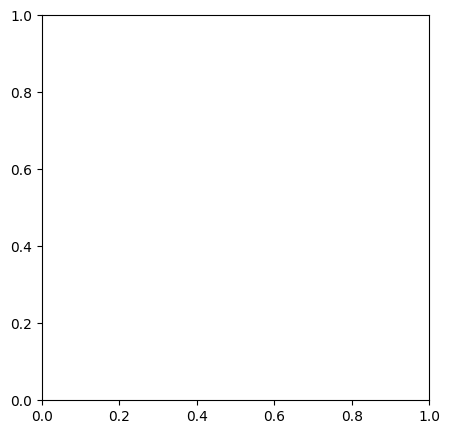

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
plt.show()

In [32]:
point = (0.5, 0.5)

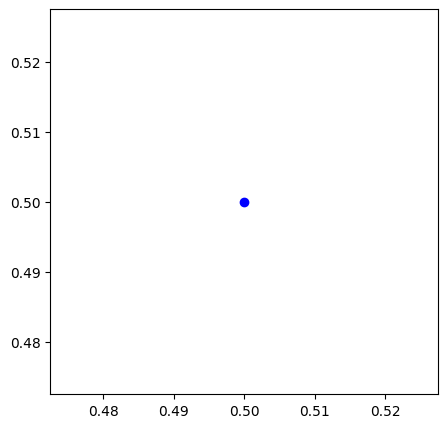

In [33]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.plot(point[0], point[1], color='blue', marker='o')
plt.show()

In [34]:
points = [(0.1, 0.5), (0.5, 0.5), (0.9, 0.5)]

In [35]:
x, y = zip(*points)
print(x)
print(y)

(0.1, 0.5, 0.9)
(0.5, 0.5, 0.5)


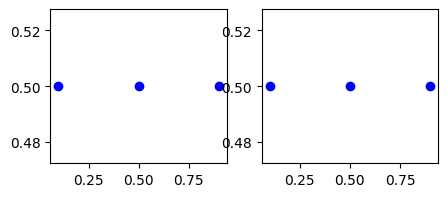

In [39]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(5,2)
axes[0].plot(x, y, color='blue', marker='o', linestyle='none')
axes[1].plot(x, y, color='blue', marker='o', linestyle='none')
output_folder = 'output'
output_path = os.path.join(output_folder, 'simple.png')
plt.savefig(output_path)

plt.show()


In [40]:
import matplotlib.pyplot as plt

point1 = (4, 1)
point2 = (3, 4)

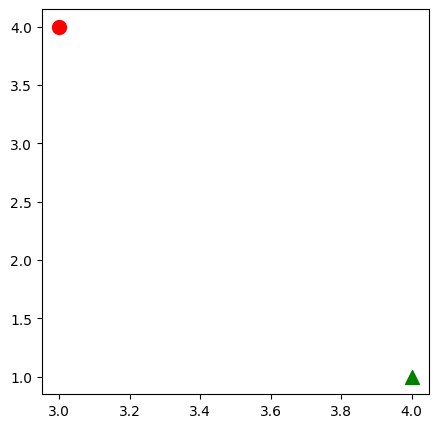

In [41]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
plt.scatter(point1[0], point1[1], color='green', marker='^', s=100)
plt.scatter(point2[0], point2[1], color='red', marker='o', s=100)
plt.show()

CREATING CHARTS


In [44]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

Creating folders for our output and input

In [45]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [46]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [47]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

Downloaded data/2020-01-metropolitan-street.csv
Downloaded data/2020-02-metropolitan-street.csv
Downloaded data/2020-03-metropolitan-street.csv
Downloaded data/2020-04-metropolitan-street.csv
Downloaded data/2020-05-metropolitan-street.csv
Downloaded data/2020-06-metropolitan-street.csv
Downloaded data/2020-07-metropolitan-street.csv
Downloaded data/2020-08-metropolitan-street.csv
Downloaded data/2020-09-metropolitan-street.csv
Downloaded data/2020-10-metropolitan-street.csv
Downloaded data/2020-11-metropolitan-street.csv
Downloaded data/2020-12-metropolitan-street.csv


In [49]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

In [50]:
merged_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87931,05780af1c8515c41499ef396a33fc4e5c248533cecd9c4...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
87932,54ce60d717f01752c5ff44f870e07a503e3fbeaae0b91e...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
87933,580fdc2edfe26a09392ab6b9128732ba0c7cd05695387a...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Offender given a caution,NaN
87934,2730906a962972bed3589463c9be9dbb8ee8e594b779a3...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


In [51]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

,0
Crime type,
Anti-social behaviour,415105
Bicycle theft,23517
Burglary,61044
Criminal damage and arson,50923
Drugs,51629
Other crime,10066
Other theft,81924
Possession of weapons,5763
Public order,53458


creating a pie chart

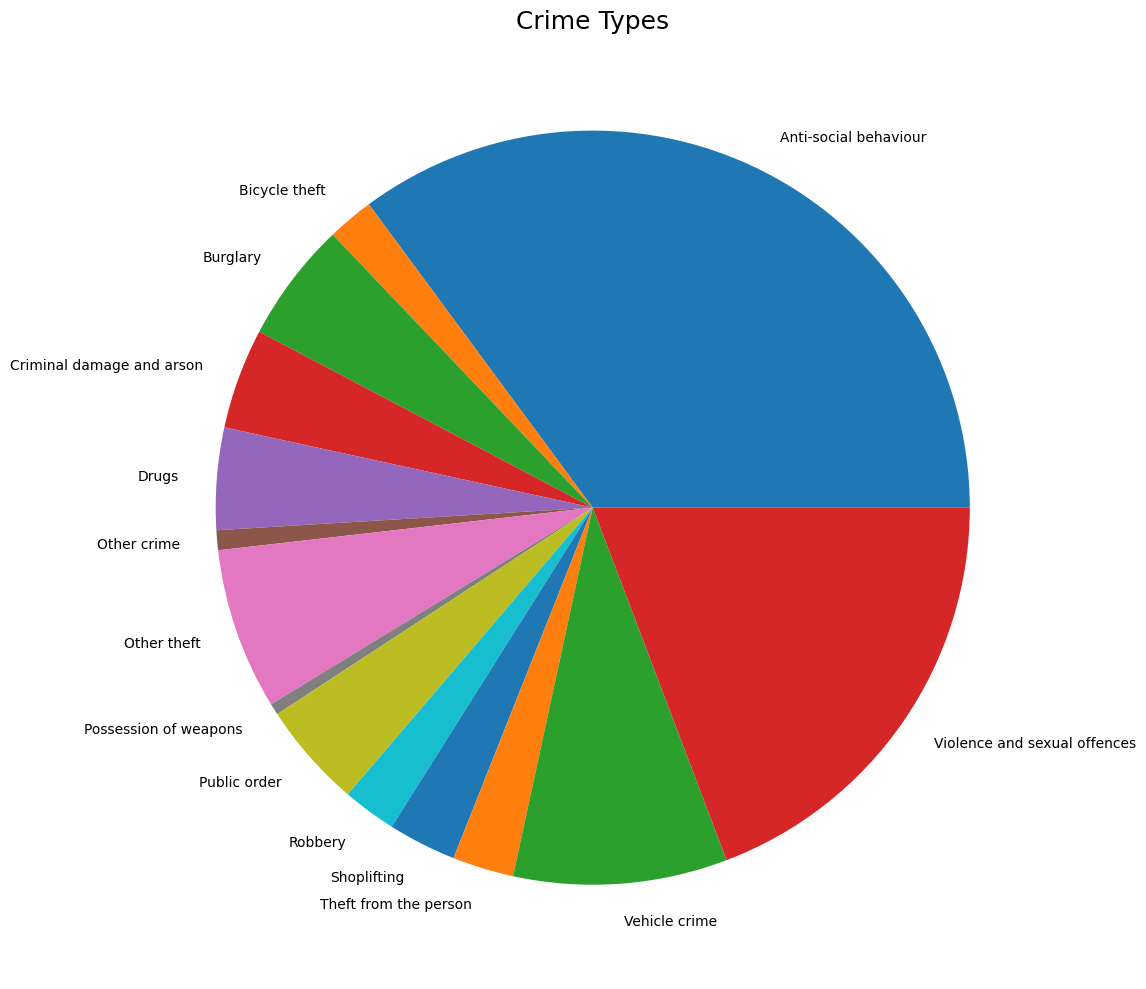

In [53]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax)

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

## CREATING A BAR CHART

In [54]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

,0
Month,
2020-01,90979
2020-02,86984
2020-03,87409
2020-04,109951
2020-05,114008
2020-06,100198
2020-07,103657
2020-08,104782
2020-09,99633


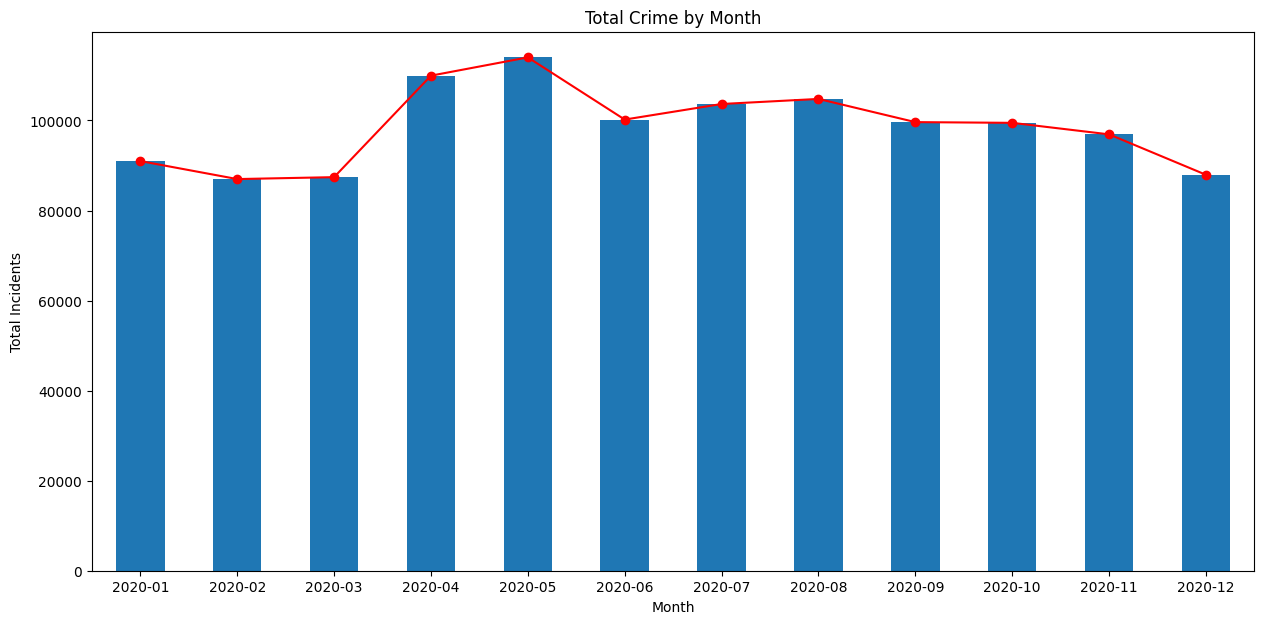

In [55]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

### Plot the trend of Bicycle thefts as a line chart


In [56]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']
bicycle_thefts

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
360,c094393925bb094348a2d13933aaa0d0b38c12a09c0e7c...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.153621,51.552200,On or near Sedgemoor Drive,E01000064,Barking and Dagenham 006E,Bicycle theft,Investigation complete; no suspect identified,NaN
619,6984333ffb944f2fd3b5045bccfe35ed2796799e57cbce...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.165546,51.545110,On or near Police Station,E01000036,Barking and Dagenham 010B,Bicycle theft,Status update unavailable,NaN
1075,f2d8f21dc493c1167f32e34b143a8291cb4a18342fe037...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.076951,51.536326,On or near East Street,E01000010,Barking and Dagenham 015C,Bicycle theft,Investigation complete; no suspect identified,NaN
1076,e0b29f9c97d5916a1e36a2873147bdd1cbfdfa0264a95e...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.080059,51.537440,On or near Police Station,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
1077,d3967d5b1463721962ca92c89462e165343cf06385acf5...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.077044,51.537106,On or near Parking Area,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87552,afded920f8373a6acbba1bdfc2c193c8842fae831bc111...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87553,780d16d9d7fc3bb50c788e163bc0fd5f24d66a6eca2d99...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87554,156a673e7839c26a04a0722edea954c9fb8782f4d8ef4f...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87555,7e9b8c2ad6d822f32ae53222669f732a24f0efde68c786...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN


In [58]:
bicycle_thefts.plot(kind='line', ax=ax, color='red', marker='o')
